<a href="https://colab.research.google.com/github/JohanGodoy1011/Extracci-n-Limpieza-y-Reporte-de-datos-con-Python/blob/main/LimpiezaDatosSalario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA: LIMPIEZA DE DATOS

# 1. El problema
Una empresa desea comprender mejor la distribución de los salarios de sus empleados y las características asociadas a los salarios más altos en su organización. El objetivo es identificar patrones y tendencias que puedan influir en la compensación de los empleados y en la estructura salarial de la empresa.

¿Cuál es la distribución de los salarios netos y brutos entre las diferentes entidades federativas, y hay alguna entidad federativa cuyos empleados tienden a tener salarios más altos en comparación con otras?

#2. El set de datos

La información recolectada por la empresa se encuentra en un archivo CSV (`salaries.csv`) con 1817690 filas y 11 columnas.

#3. Verificar el dataset

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive

drive.mount('/gdrive')

ruta = "salaries.csv"

data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(data.shape)
data.head()

(20238, 11)


,entidadfederativa,sujetoobligado,nombre,denominacion,montoneto,cargo,area,montobruto,idInformacion,periodoreportainicio,periodoreportafin
0,Hidalgo,Jaltocán,Adolfo Hernandez Hernandez,Fontanero,4000.00,Fontanero,OBRAS PUBLICAS,4254.00,16311845.0,01/01/2018,30/06/2018
1,Ciudad de México,Secretaría de Salud,ARELY SAMANTA CLEOFAS VELASCO,"AUXILIAR DE ENFERMERIA ""A""",12177.86,"AUXILIAR DE ENFERMERIA ""A""",H.G. ENRIQUE CABRERA,16092.00,16480190.0,01/01/2018,31/03/2018
2,Ciudad de México,Secretaría de Seguridad Ciudadana,MELODY OLIMPIC GONZALEZ MONTES,POLICIA PRIMERO,11652.00,POLICIA PRIMERO,SUBSECRETARIA DE OPERACION POLICIAL,16030.00,17599078.0,01/01/2020,31/03/2020
3,Federación,Autoridad Educativa Federal en la Ciudad de Mé...,ANGEL ALLENDE PULIDO,APOYO Y ASISTENCIA A LA EDUCACION,10180.57,APOYO Y ASISTENCIA A LA EDUCACION,DIRECCIÓN GENERAL DE OPERACIONES DE SERVICIOS ...,2910.65,6514612.0,01/07/2018,31/12/2018
4,Aguascalientes,MUNICIPIO DE RINCÓN DE ROMOS,Yolanda Reyes Gonzalez,DIRECTOR,17004.40,DIRECTOR,ACCION CIVICA,6188.40,11927166.0,01/07/2019,31/12/2019


In [ ]:
# Mostrar información sobre el DataFrame
print(data.shape)
data.info()

(20238, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20238 entries, 0 to 20237
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entidadfederativa     20238 non-null  object 
 1   sujetoobligado        20238 non-null  object 
 2   nombre                19893 non-null  object 
 3   denominacion          19663 non-null  object 
 4   montoneto             19288 non-null  float64
 5   cargo                 19663 non-null  object 
 6   area                  19872 non-null  object 
 7   montobruto            19787 non-null  float64
 8   idInformacion         20237 non-null  float64
 9   periodoreportainicio  20237 non-null  object 
 10  periodoreportafin     20237 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.7+ MB


# 4. Limpieza
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:
1.   Datos faltantes en algunas celdas
2.   Columnas irrelevantes (que no corresponden al problema que queremos resolver)
3. Registros (filas) repetidos.
4. Valores externos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos.
5. Errores tipográficos en el caso de las variables categóricas.

Al final de este proceso de limipeza deberíamos tener un dataset íntegro, listo para la fase de Análisis Exploratorio.



## 4.1 Datos faltantes

Datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [ ]:
data.dropna(inplace=True)
print(data.shape)
data.info()

(18869, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18869 entries, 0 to 20235
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entidadfederativa     18869 non-null  object 
 1   sujetoobligado        18869 non-null  object 
 2   nombre                18869 non-null  object 
 3   denominacion          18869 non-null  object 
 4   montoneto             18869 non-null  float64
 5   cargo                 18869 non-null  object 
 6   area                  18869 non-null  object 
 7   montobruto            18869 non-null  float64
 8   idInformacion         18869 non-null  float64
 9   periodoreportainicio  18869 non-null  object 
 10  periodoreportafin     18869 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.7+ MB


- Después de aplicar dropna(), se eliminaron las filas que contenían al menos un valor nulo en alguna de las columnas. Por lo tanto, el número de filas se redujo de 1,978,155 a 1,850,529.
- Las columnas y sus tipos de datos permanecen iguales: object para las columnas de texto, float64 para las columnas numéricas y int64 para la columna de números enteros.
- La memoria utilizada por el DataFrame después de eliminar las filas nulas ha aumentado ligeramente de aproximadamente 166.0 MB a 169.4 MB. Esto puede deberse a que la operación de eliminación de filas nulas creó un nuevo DataFrame en memoria con menos filas, pero el tamaño total de los datos restantes sigue siendo similar.

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**.
- **Una columna categórica pero con un sólo nivel**.
- **Una columna numérica pero con un sólo valor**.
- **Columnas con información redundante**.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [ ]:
# Eliminamos la columa irrelevante, no aporta información sobre los salarios
data = data.drop('idInformacion', axis=1)

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['entidadfederativa', 'sujetoobligado', 'nombre', 'denominacion', 'cargo', 'area', 'periodoreportainicio', 'periodoreportafin']

for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')


Columna entidadfederativa: 31 subniveles
Columna sujetoobligado: 1045 subniveles
Columna nombre: 18389 subniveles
Columna denominacion: 4938 subniveles
Columna cargo: 4938 subniveles
Columna area: 8316 subniveles
Columna periodoreportainicio: 147 subniveles
Columna periodoreportafin: 159 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [ ]:
data.describe()

,montoneto,montobruto
count,1.886900e+04,18869.000000
mean,1.303906e+04,16375.786141
std,2.475035e+04,20298.196077
min,-2.151761e+05,-243402.140000
25%,6.039360e+03,7752.180000
50%,9.756000e+03,12216.210000
75%,1.512490e+04,18580.020000
max,2.508053e+06,961292.760000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero en tu conjunto de datos. Una desviación estándar de cero indicaría que todos los valores de la variable son iguales, lo cual no es el caso en nuestro analisis.

Por lo tanto, al observar las desviaciones estándar proporcionadas en la salida del método describe(), puedes ver que todas son distintas de cero. Esto significa que hay variabilidad en los datos de cada una de las columnas numéricas: montoneto, montobruto.

##4.3 Filas repetidas

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (18869, 10)
Tamaño del set después de eliminar las filas repetidas: (18824, 10)


Se eliminaron registros al ejecutar el comando drop_duplicate

##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

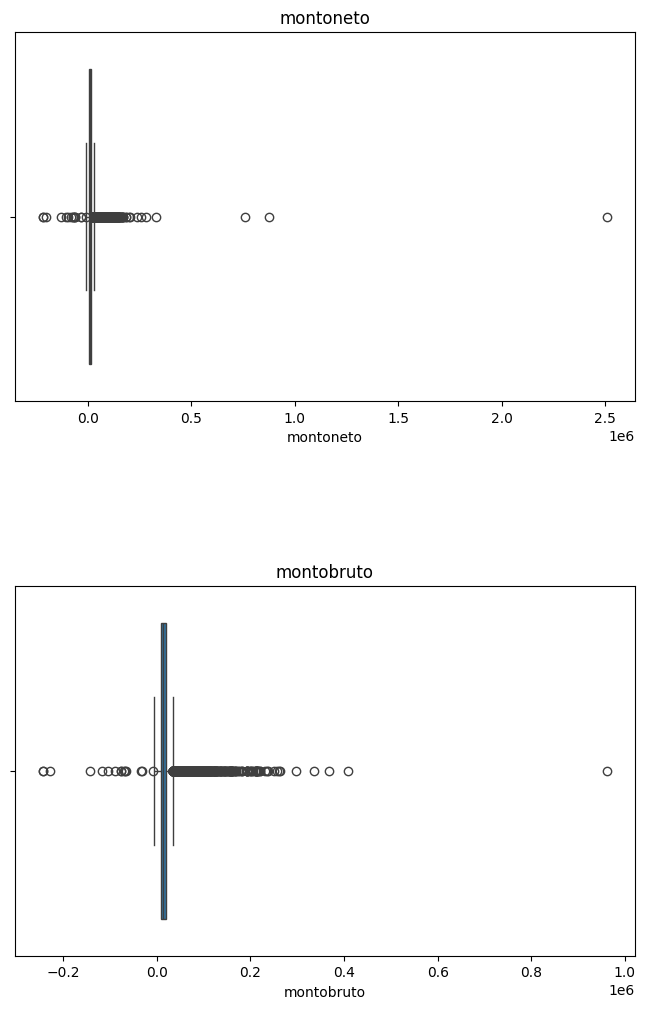

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['montoneto', 'montobruto']

# Creamos una figura con 2 subgráficos, una fila y 2 columnas
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
fig.subplots_adjust(hspace=0.5)

# Iteramos sobre las columnas numéricas y creamos un boxplot para cada una
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

plt.show()

**Observaciones:**
- "monto bruto": hay un monto bruto con valores negativos

In [ ]:
# Eliminar filas con "monto bruto" <= 0
print(f'Tamaño del conjunto antes de eliminar registros de monto bruto: {data.shape}')
data = data[data['montobruto'] > 0]
print(f'Tamaño del conjunto después de eliminar registros de monto bruto: {data.shape}')


Tamaño del conjunto antes de eliminar registros de monto bruto: (18824, 10)
Tamaño del conjunto después de eliminar registros de monto bruto: (18471, 10)


In [ ]:
data.shape

(18471, 10)

In [ ]:
# Convertir fechas a formato adecuado
data['periodoreportainicio'] = pd.to_datetime(data['periodoreportainicio'], format='%d/%m/%Y', errors='coerce')
data['periodoreportafin'] = pd.to_datetime(data['periodoreportafin'], format='%d/%m/%Y', errors='coerce' )


## 4.5. Observaciones

Hay algunos valores que están fuera del formato esperado o tienen años incorrectos,o estan fuera del rango esperado de 2018-2019 y poseen valores Nulos

In [ ]:
# Filtrar las fechas desde el 1 de enero de 2018 hasta el 31 de diciembre de 2020
data = data[(data['periodoreportainicio'].dt.year >= 2018) & (data['periodoreportainicio'].dt.year == 2020)]

# Imprimir los valores únicos de 'periodoreportainicio' y 'periodoreportafin' después del filtrado
print("Fechas de inicio únicas después del filtrado:")
print(data['periodoreportainicio'].unique())

print("\nFechas de fin únicas después del filtrado:")
print(data['periodoreportafin'].unique())



Fechas de inicio únicas después del filtrado:
['2020-01-01T00:00:00.000000000' '2020-05-01T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-04-16T00:00:00.000000000'
 '2020-05-16T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-03-16T00:00:00.000000000' '2020-01-16T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-06-16T00:00:00.000000000' '2020-01-02T00:00:00.000000000'
 '2020-10-01T00:00:00.000000000']

Fechas de fin únicas después del filtrado:
['2020-03-31T00:00:00.000000000' '2020-05-15T00:00:00.000000000'
 '2020-06-30T00:00:00.000000000' '2020-05-31T00:00:00.000000000'
 '2020-02-29T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-07-15T00:00:00.000000000' '2020-04-30T00:00:00.000000000'
 '2020-03-30T00:00:00.000000000' '2020-02-15T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-04-15T00:00:00.000000000'
 '2020-02-28T00:00:00.000000000

In [ ]:
data.shape

(2338, 10)

##4.6 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como Ciudad de México y México que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

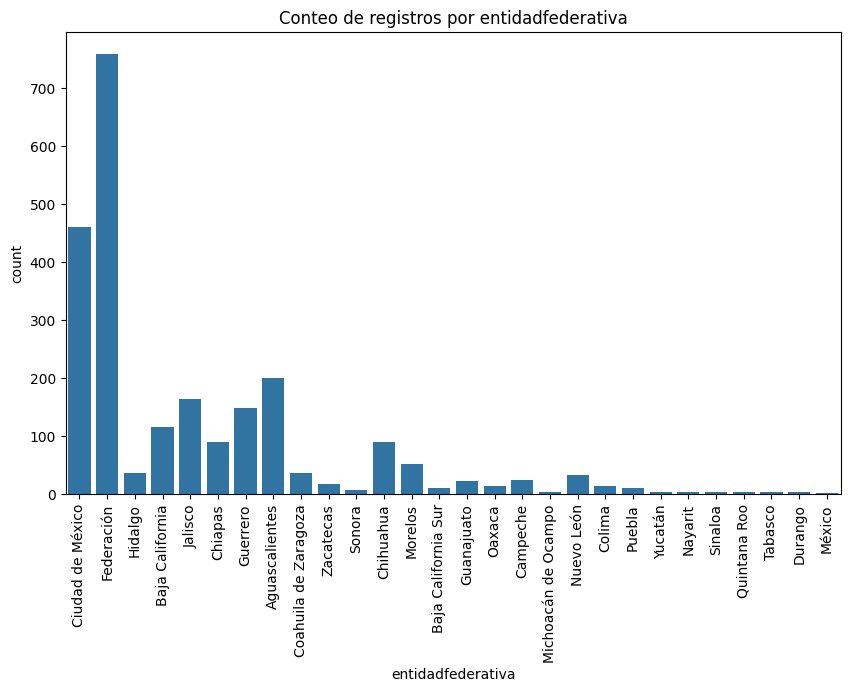

In [ ]:
# Graficar los subniveles de la variable categórica 'entidadfederativa'
col = 'entidadfederativa'
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=col, data=data, ax=ax)
ax.set_title(f'Conteo de registros por {col}')
ax.set_xlabel(col)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [ ]:
# entidad federativa: unificar mexico y ciudad de mexico
print(data['entidadfederativa'].unique())
data.loc[data['entidadfederativa']=='México','entidadfederativa']='Ciudad de México'
print(data['entidadfederativa'].unique())

['Ciudad de México' 'Federación' 'Hidalgo' 'Baja California' 'Jalisco'
 'Chiapas' 'Guerrero' 'Aguascalientes' 'Coahuila de Zaragoza' 'Zacatecas'
 'Sonora' 'Chihuahua' 'Morelos' 'Baja California Sur' 'Guanajuato'
 'Oaxaca' 'Campeche' 'Michoacán de Ocampo' 'Nuevo León' 'Colima' 'Puebla'
 'Yucatán' 'Nayarit' 'Sinaloa' 'Quintana Roo' 'Tabasco' 'Durango' 'México']
['Ciudad de México' 'Federación' 'Hidalgo' 'Baja California' 'Jalisco'
 'Chiapas' 'Guerrero' 'Aguascalientes' 'Coahuila de Zaragoza' 'Zacatecas'
 'Sonora' 'Chihuahua' 'Morelos' 'Baja California Sur' 'Guanajuato'
 'Oaxaca' 'Campeche' 'Michoacán de Ocampo' 'Nuevo León' 'Colima' 'Puebla'
 'Yucatán' 'Nayarit' 'Sinaloa' 'Quintana Roo' 'Tabasco' 'Durango']


In [ ]:
data.shape

(2338, 10)

In [ ]:
ruta = "salaries_clean2.csv"
data.to_csv(ruta)